In [0]:
# Importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_theme(style='whitegrid',palette='pastel')
import pickle

from sklearn.preprocessing import StandardScaler,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

import torch 
from torch import nn
from torch.utils.data import DataLoader,Dataset

from copy import deepcopy

# Defining Functions and Classes

In [1]:
class to_do_lst:
    def __init__(self,counter = 1):
        super().__init__()
        self.lst = []
        self.counter = counter
        
    def add(self, statement):
        self.lst.append(str(self.counter) + ' ' + statement)
        self.counter += 1
        
    def remove(index):
        self.lst.pop(index)
        
    def print_todo_lst(self):
        for i in self.lst:
            print(i)
to_do = to_do_lst()

# 1) Importing the data

In [2]:
#Importing the data using pandas
df = pd.read_csv('train.csv')

# 2) Understanding the data

1) Sample of the dataset
2) Name of the columns in the datset
3) Number of instances and number of features in the dataset
4) Dtypes of the features
5) Stastical information about the numerical columns
6) Null/Missing values in the dataset
7) Number of dupicated instances in the dataset
8) Correlation between the numerical columns
9) Skewness in the dataset

In [3]:
df.sample(5)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
590,591,595249,865315,5,52227,1,1,14,157,54,136,520084.0
446,447,544593,874532,2,109453,5,4,13,159,99,105,274075.0
276,277,680771,842283,4,52266,3,5,13,139,100,124,553901.0
69,70,685935,784038,5,111461,2,8,12,142,73,114,304216.5
170,171,639975,860663,5,60199,1,10,12,185,118,137,558253.0


In [4]:
df.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [5]:
#Renaming columns
df.rename({'v.id' : "vechile_id", "on road old" : "on_road_age",
           "on road now" : 'age','top speed' : 'top_speed',
           'current price' : 'current_price'}, axis = 1,inplace = True)

In [6]:
df.columns

Index(['vechile_id', 'on_road_age', 'age', 'years', 'km', 'rating',
       'condition', 'economy', 'top_speed', 'hp', 'torque', 'current_price'],
      dtype='object')

In [7]:
df.shape

(1000, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   vechile_id     1000 non-null   int64  
 1   on_road_age    1000 non-null   int64  
 2   age            1000 non-null   int64  
 3   years          1000 non-null   int64  
 4   km             1000 non-null   int64  
 5   rating         1000 non-null   int64  
 6   condition      1000 non-null   int64  
 7   economy        1000 non-null   int64  
 8   top_speed      1000 non-null   int64  
 9   hp             1000 non-null   int64  
 10  torque         1000 non-null   int64  
 11  current_price  1000 non-null   float64
dtypes: float64(1), int64(11)
memory usage: 93.9 KB


In [9]:
df.describe()

,vechile_id,on_road_age,age,years,km,rating,condition,economy,top_speed,hp,torque,current_price
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.00000
mean,500.500000,601648.286000,799131.3970,4.561000,100274.430000,2.988000,5.592000,11.625000,166.89300,84.54600,103.423000,308520.24250
std,288.819436,58407.246204,57028.9502,1.719079,29150.463233,1.402791,2.824449,2.230549,19.28838,20.51694,21.058716,126073.25915
min,1.000000,500265.000000,700018.0000,2.000000,50324.000000,1.000000,1.000000,8.000000,135.00000,50.00000,68.000000,28226.50000
25%,250.750000,548860.500000,750997.7500,3.000000,74367.500000,2.000000,3.000000,10.000000,150.00000,67.00000,85.000000,206871.75000
50%,500.500000,601568.000000,798168.0000,5.000000,100139.500000,3.000000,6.000000,12.000000,166.00000,84.00000,104.000000,306717.75000
75%,750.250000,652267.250000,847563.2500,6.000000,125048.000000,4.000000,8.000000,13.000000,184.00000,102.00000,121.000000,414260.87500
max,1000.000000,699859.000000,899797.0000,7.000000,149902.000000,5.000000,10.000000,15.000000,200.00000,120.00000,140.000000,584267.50000


In [10]:
pd.DataFrame(df.isna().sum(),columns=['# Null values']).T

,vechile_id,on_road_age,age,years,km,rating,condition,economy,top_speed,hp,torque,current_price
# Null values,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
df.duplicated().sum()

0

In [12]:
to_do.add("Plot correlation")
df.corr()[['current_price']].iloc[:-1].T

,vechile_id,on_road_age,age,years,km,rating,condition,economy,top_speed,hp,torque
current_price,-0.05946,0.233035,0.282793,-0.011854,-0.935924,0.035038,0.110108,-0.034711,-0.027993,0.030238,-0.00229


In [13]:
to_do.add("Plot skewness")
pd.DataFrame(df.skew(),columns=['Skewness']).T

,vechile_id,on_road_age,age,years,km,rating,condition,economy,top_speed,hp,torque,current_price
Skewness,0.0,-0.060868,0.003296,-0.029663,-0.022624,-0.004806,-0.060334,-0.061692,0.064535,0.023485,-0.005675,0.025161


# Exploratory data analysis

# Univariate Analysis

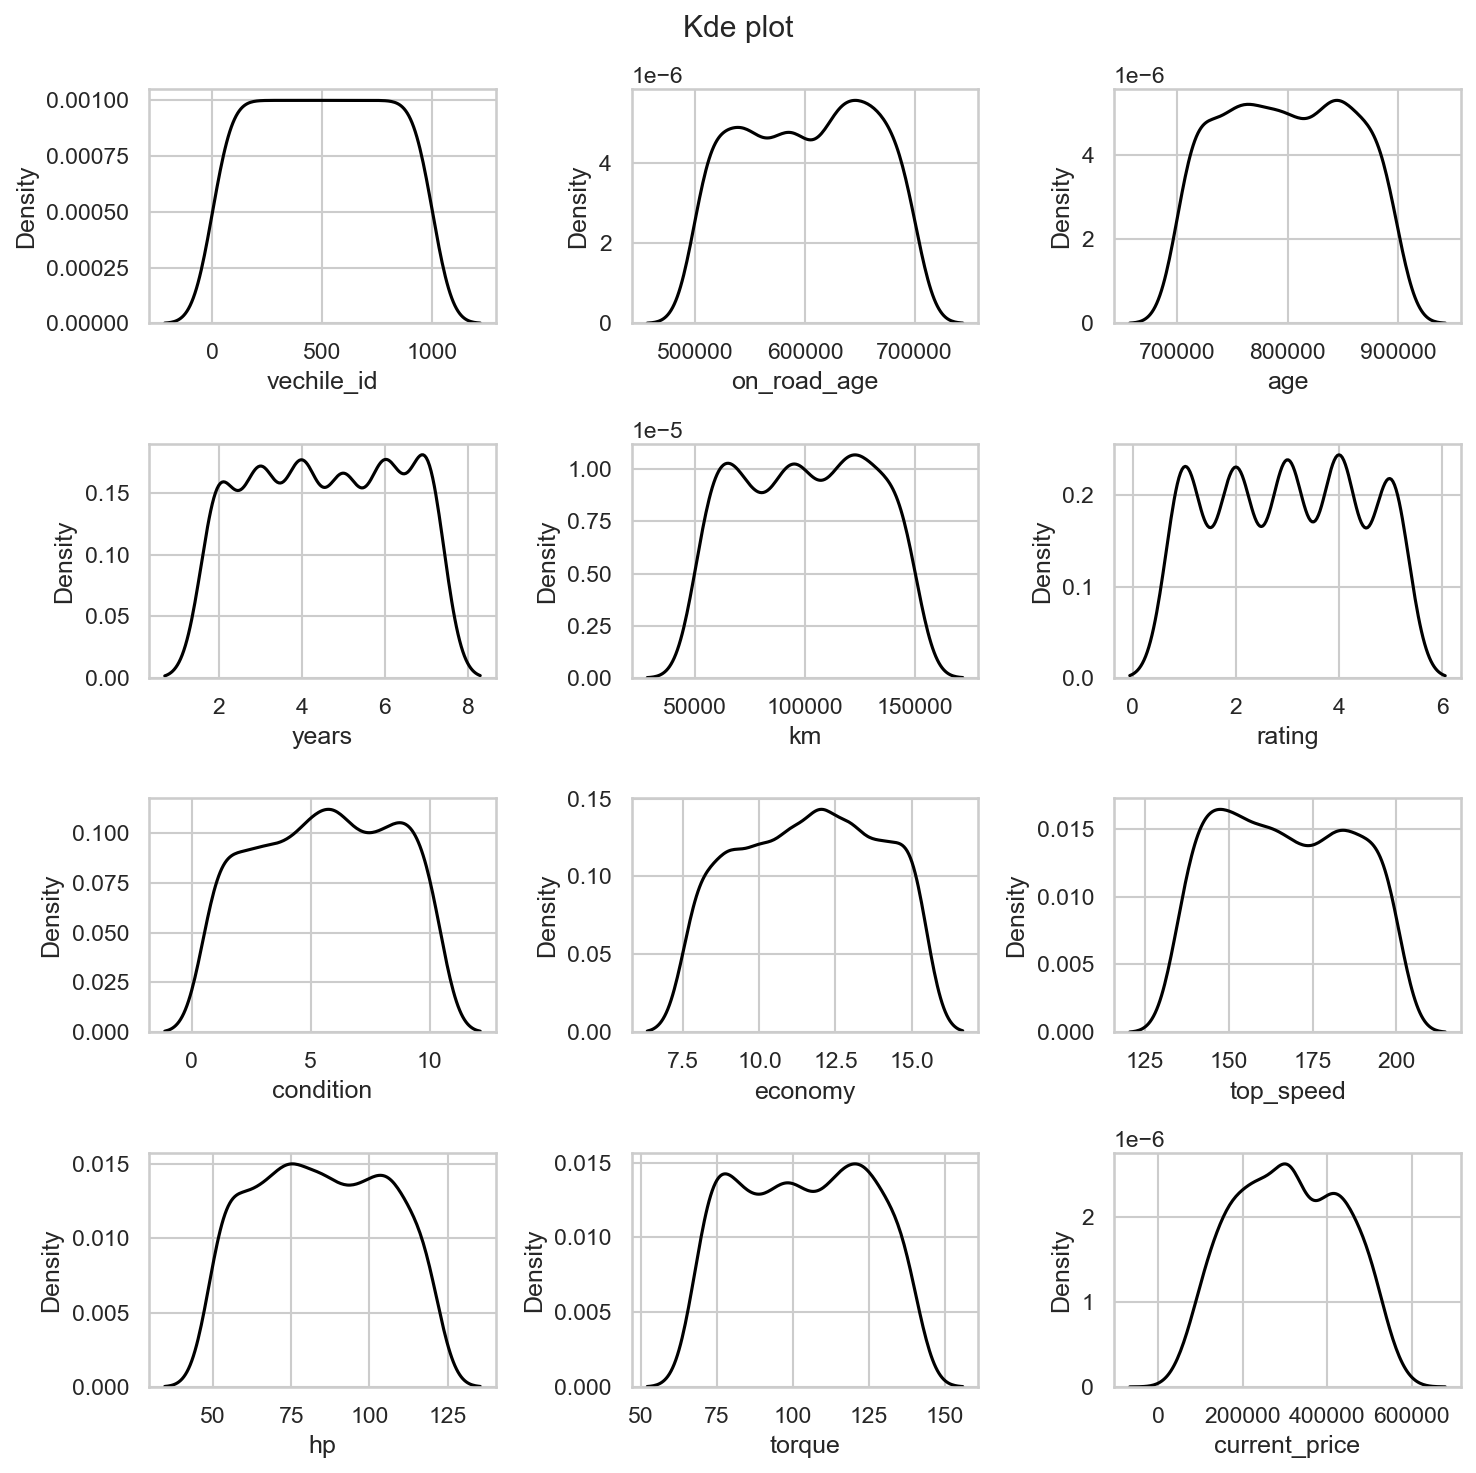

In [14]:
plt.figure(figsize=(10,10),dpi = 150)
for num,col in enumerate(df.columns,start = 1):
    plt.subplot(4,3,num)
    sns.kdeplot(data = df,x = col,color = 'black')
plt.suptitle('Kde plot')
plt.tight_layout()

In [15]:
#Categorical columns
categorical_colums = ['years', 'rating', 'condition', 'economy']

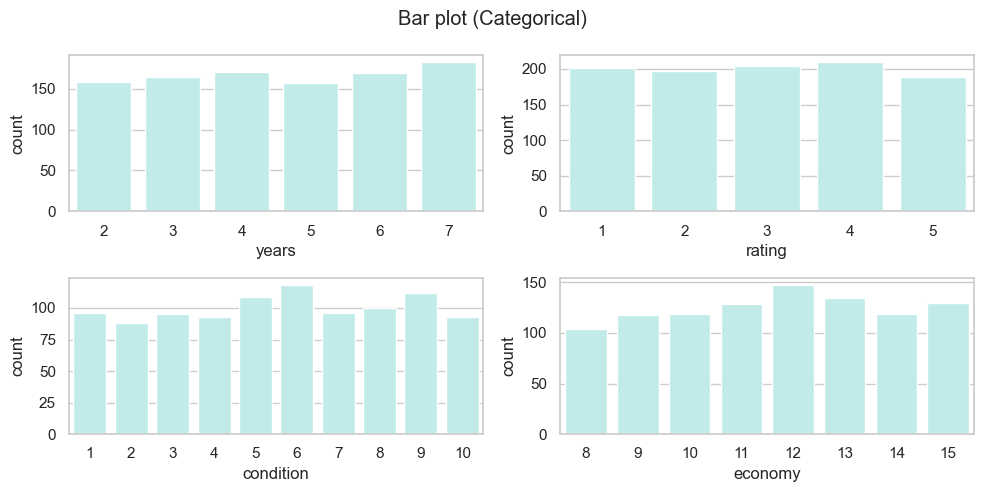

In [16]:
plt.figure(figsize=(10,5),dpi = 100)
for num,col in enumerate(categorical_colums,start = 1):
    plt.subplot(2,2,num)
    color = sns.color_palette('pastel')[-1]
    x = df[col].value_counts().keys()
    y = df[col].value_counts().values
    sns.barplot(x = x,y = y,color = color)
    plt.xlabel(col)
    plt.ylabel('count')
plt.suptitle("Bar plot (Categorical)")
plt.tight_layout()

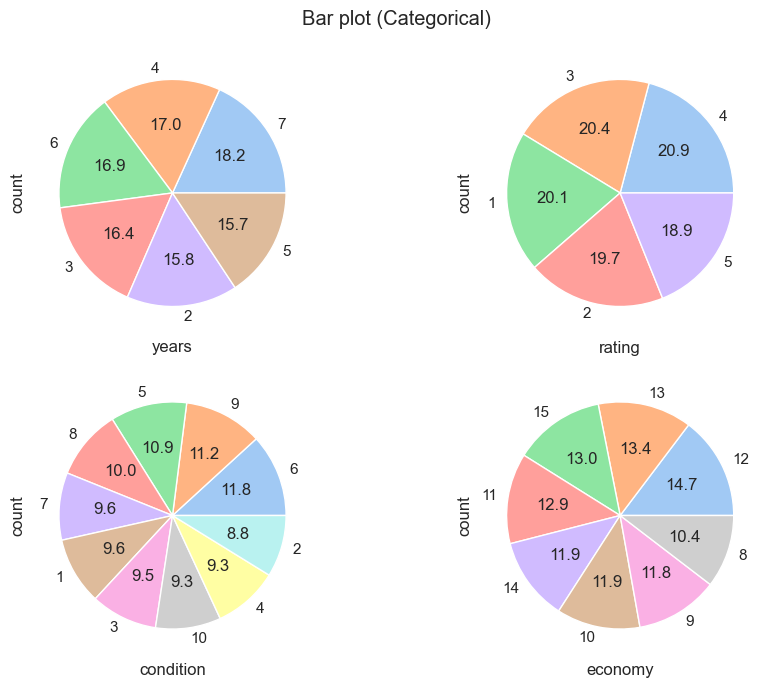

In [17]:
plt.figure(figsize=(10,7),dpi = 100)
for num,col in enumerate(categorical_colums,start = 1):
    plt.subplot(2,2,num)
    plt.pie(df[col].value_counts(),autopct="%0.1f" ,labels=df[col].value_counts().keys())
    plt.xlabel(col)
    plt.ylabel('count')
plt.suptitle("Bar plot (Categorical)")
plt.tight_layout()

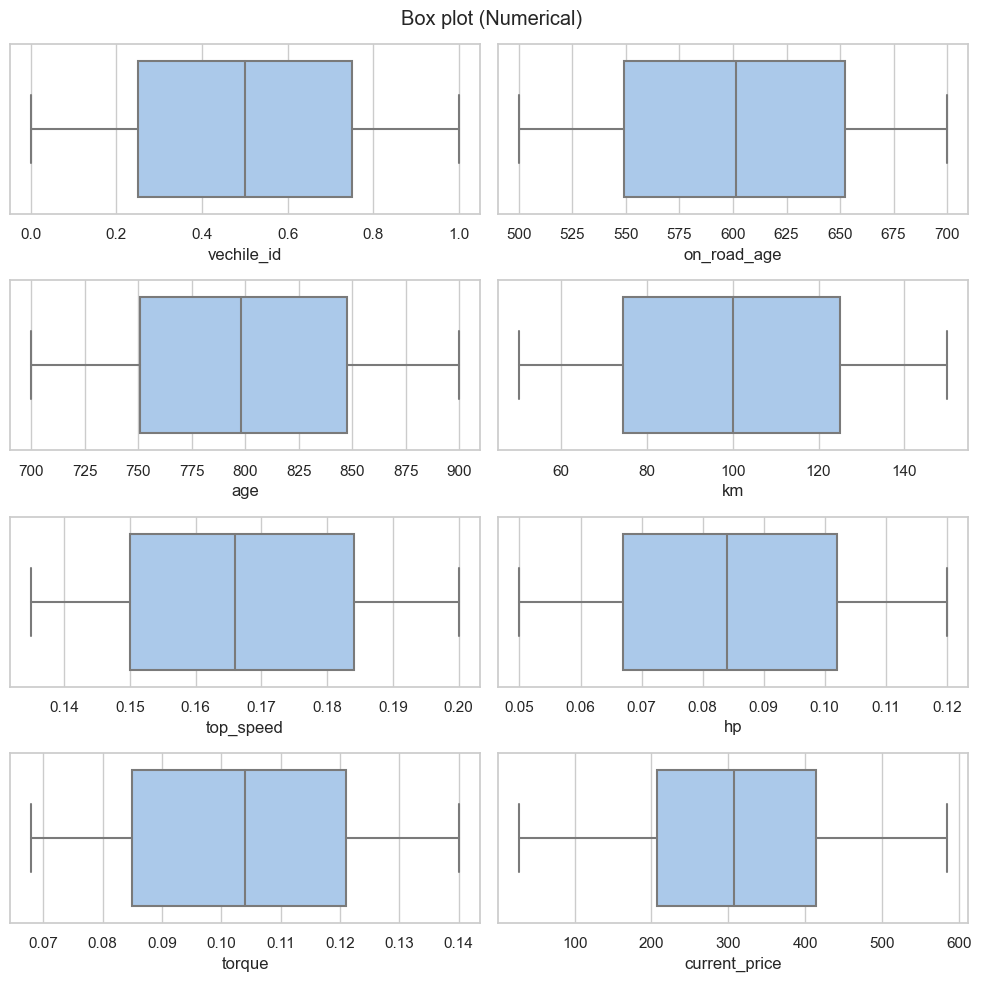

In [18]:
plt.figure(figsize=(10,10),dpi = 100)
for num,col in enumerate(df.drop(categorical_colums,axis = 1).columns,start=1):
    plt.subplot(4,2,num)
    sns.boxplot(data = df[[col]]/1000,x = col)
plt.suptitle('Box plot (Numerical)')
plt.tight_layout()

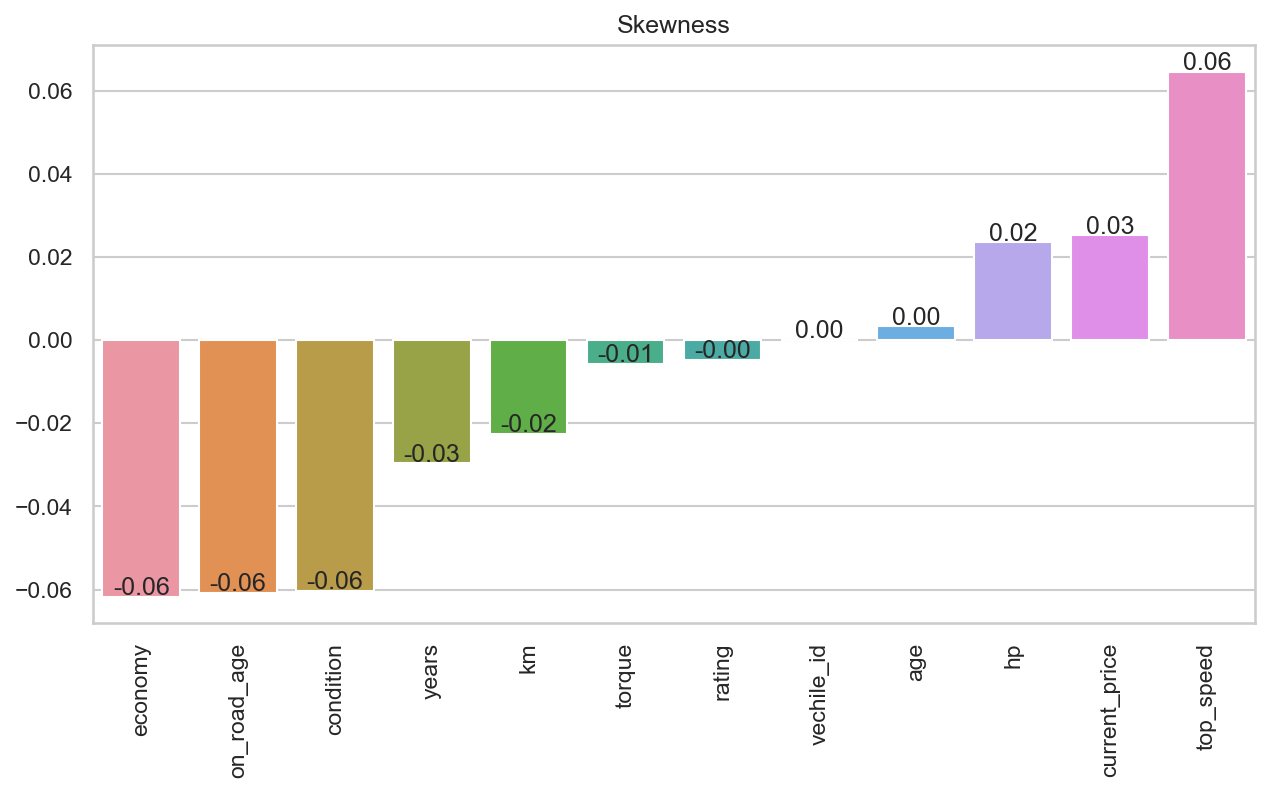

In [19]:
plt.figure(figsize=(10,5),dpi = 150)
ax = sns.barplot(x = df.skew().sort_values().keys(),y = df.skew().sort_values().values)
for p, value in zip(ax.patches, df.skew().sort_values().values):
    ax.annotate(f'{value:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.003),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Skewness')
plt.xticks(rotation = 90)
plt.show()

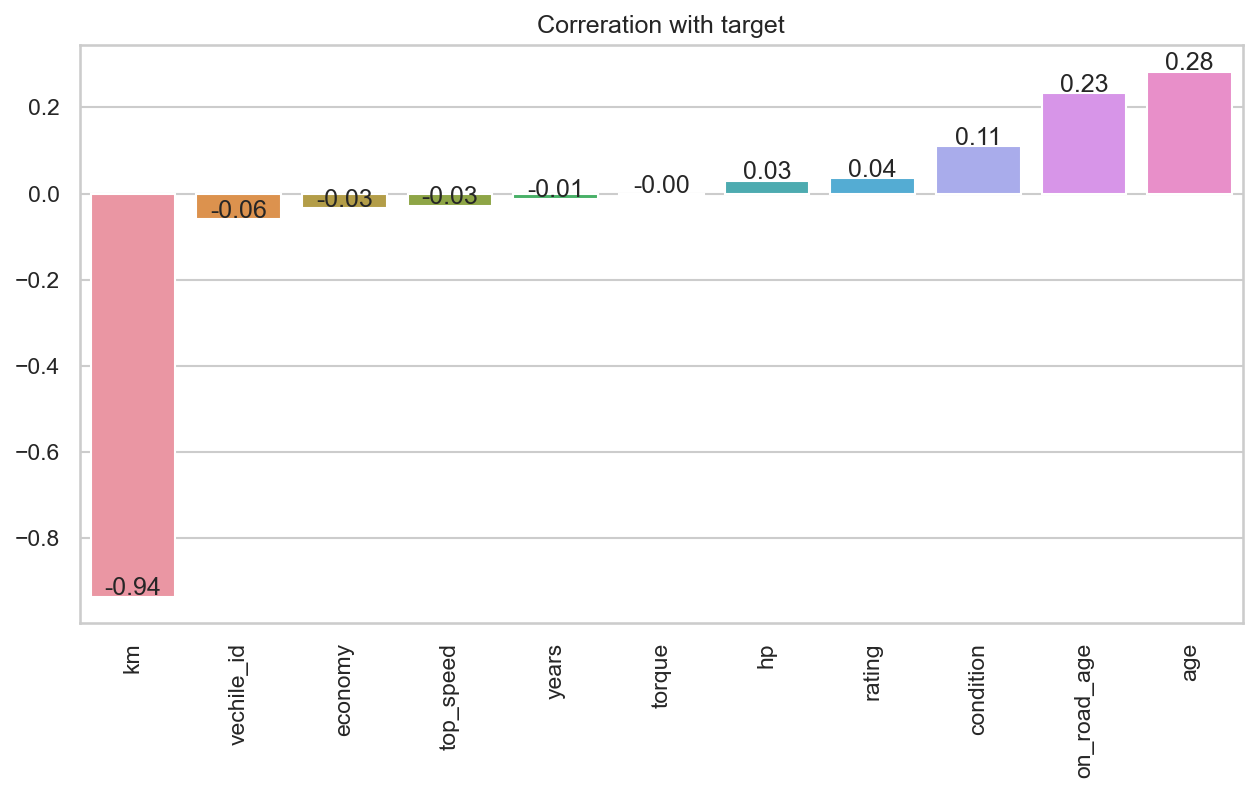

In [20]:
plt.figure(figsize=(10,5),dpi = 150)
ax = sns.barplot(x = df.corr()['current_price'].sort_values().keys()[:-1],y = df.corr()['current_price'].sort_values().values[:-1])
for p, value in zip(ax.patches, df.corr()['current_price'].sort_values().values[:-1]):
    ax.annotate(f'{value:.2f}', (p.get_x() + p.get_width() / 2., p.get_height()-0.03),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.title('Correration with target')
plt.xticks(rotation = 90)
plt.show()

In [21]:
df.corr()['current_price'].sort_values()

km              -0.935924
vechile_id      -0.059460
economy         -0.034711
top_speed       -0.027993
years           -0.011854
torque          -0.002290
hp               0.030238
rating           0.035038
condition        0.110108
on_road_age      0.233035
age              0.282793
current_price    1.000000
Name: current_price, dtype: float64

In [22]:
df.drop(['vechile_id'],axis = 1,inplace=True)

In [23]:
corr_dataframe = pd.DataFrame((np.abs(df.corr()['current_price'].sort_values()[:-1])*100/(np.sum(np.abs(df.corr()['current_price'].sort_values()[:-1].values)))).sort_values(ascending = False))

In [24]:
corr_dataframe

,current_price
km,54.925657
age,16.595980
on_road_age,13.675890
condition,6.461823
rating,2.056213
economy,2.037025
hp,1.774568
top_speed,1.642782
years,0.695678
torque,0.134383


# Multi-variate analysis

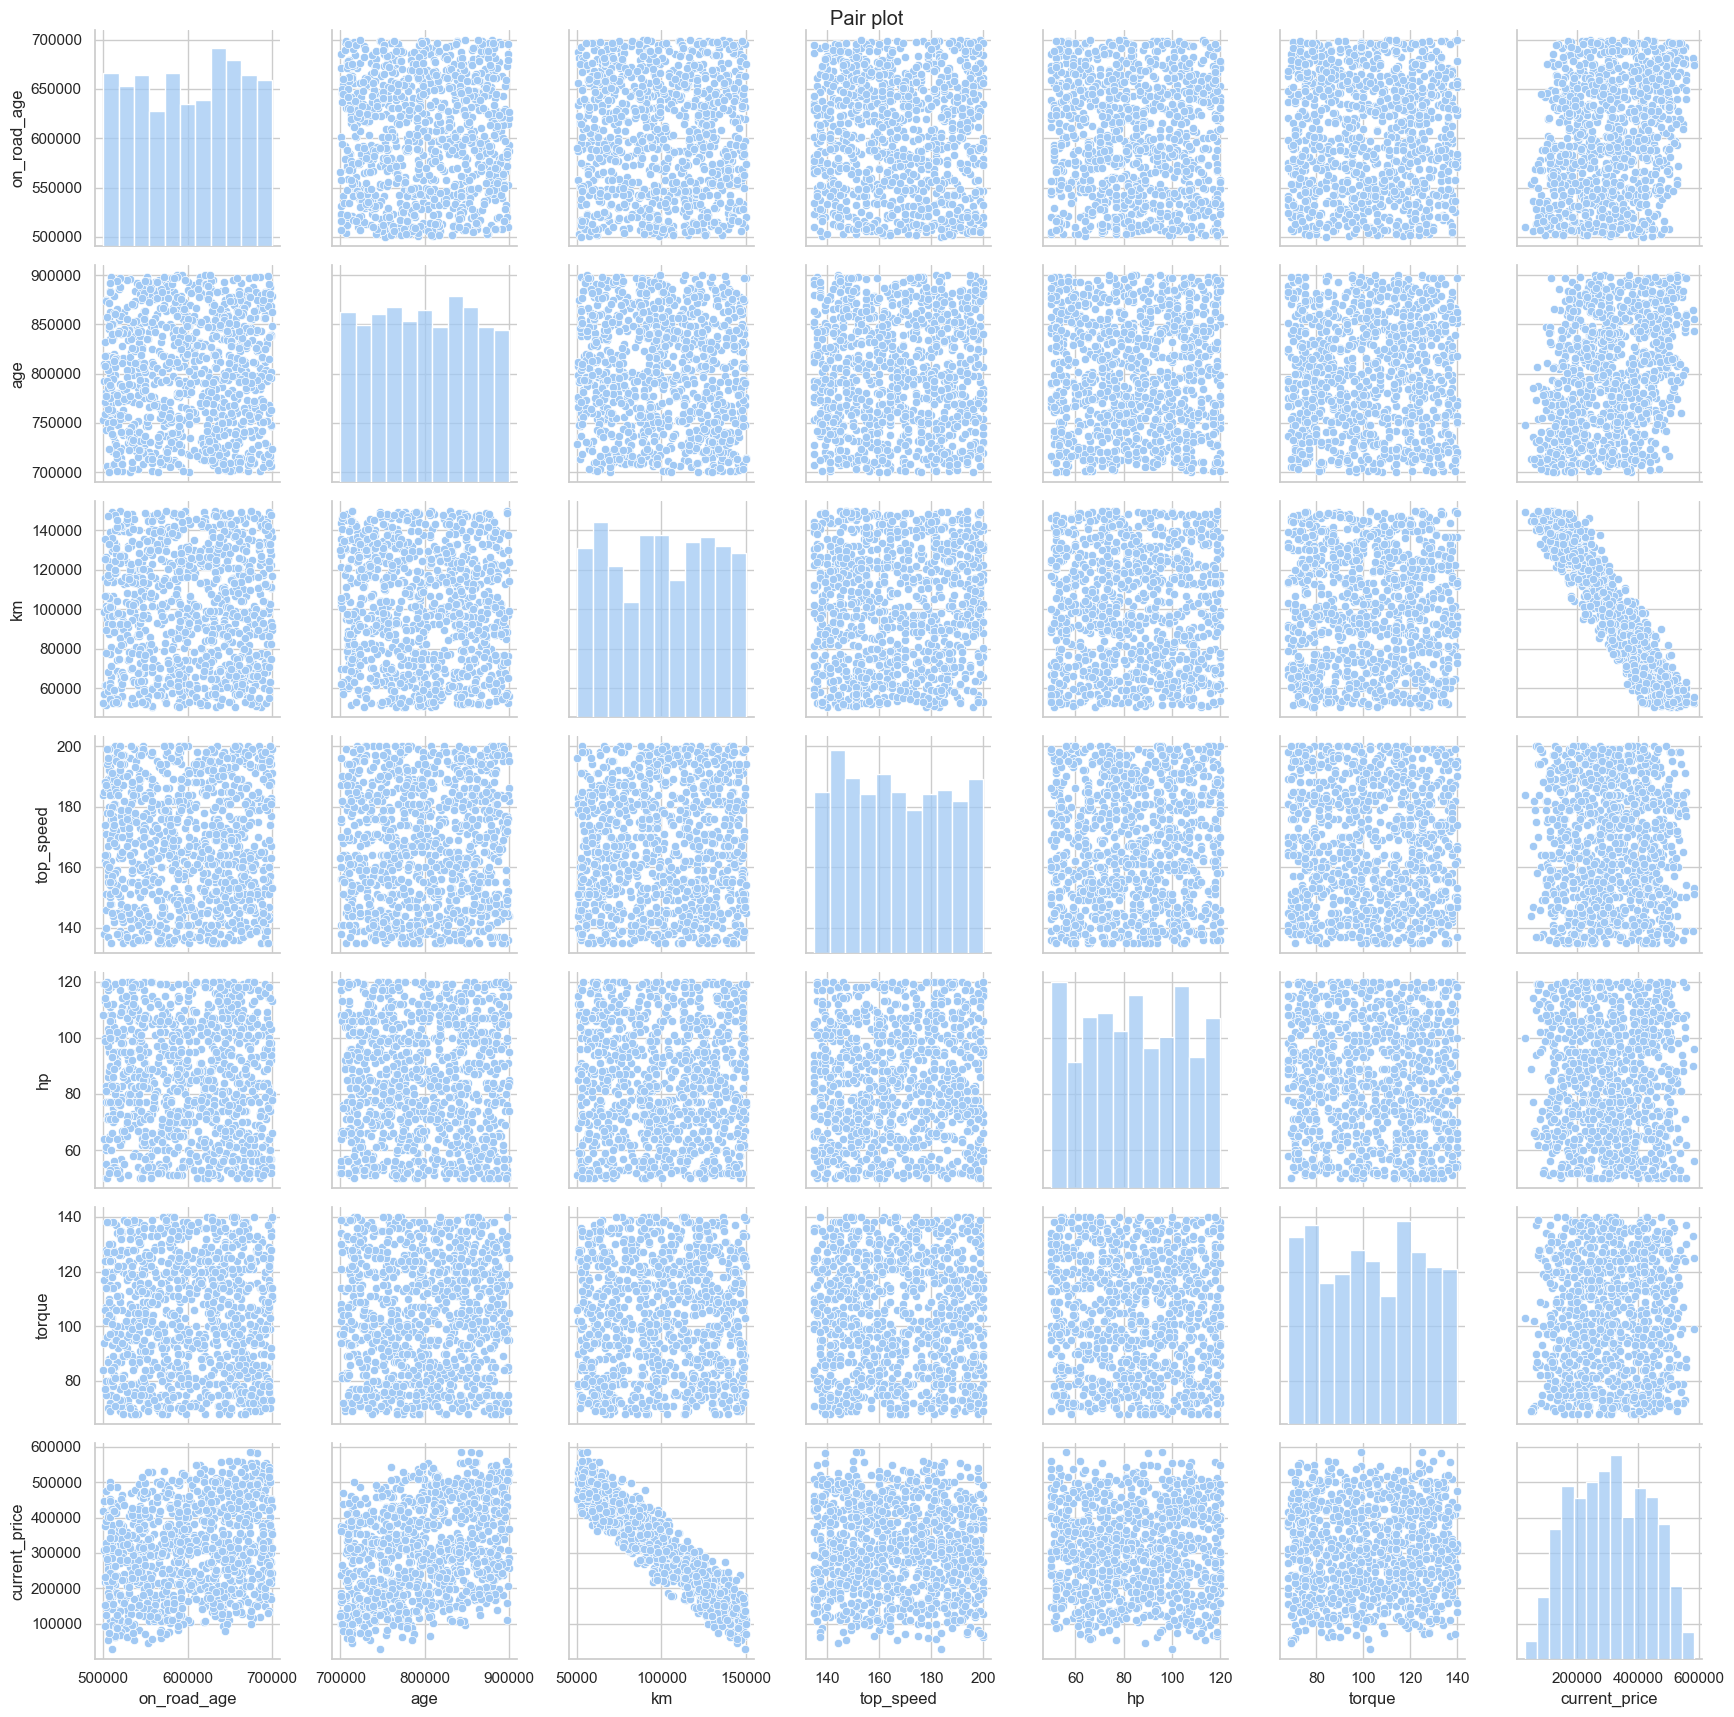

In [25]:
sns.pairplot(df.drop(categorical_colums,axis = 1))
plt.suptitle('Pair plot')
plt.tight_layout()
plt.show()

In [26]:
high_correlated_col = ['km','hp','rating','condition','on_road_age','age']

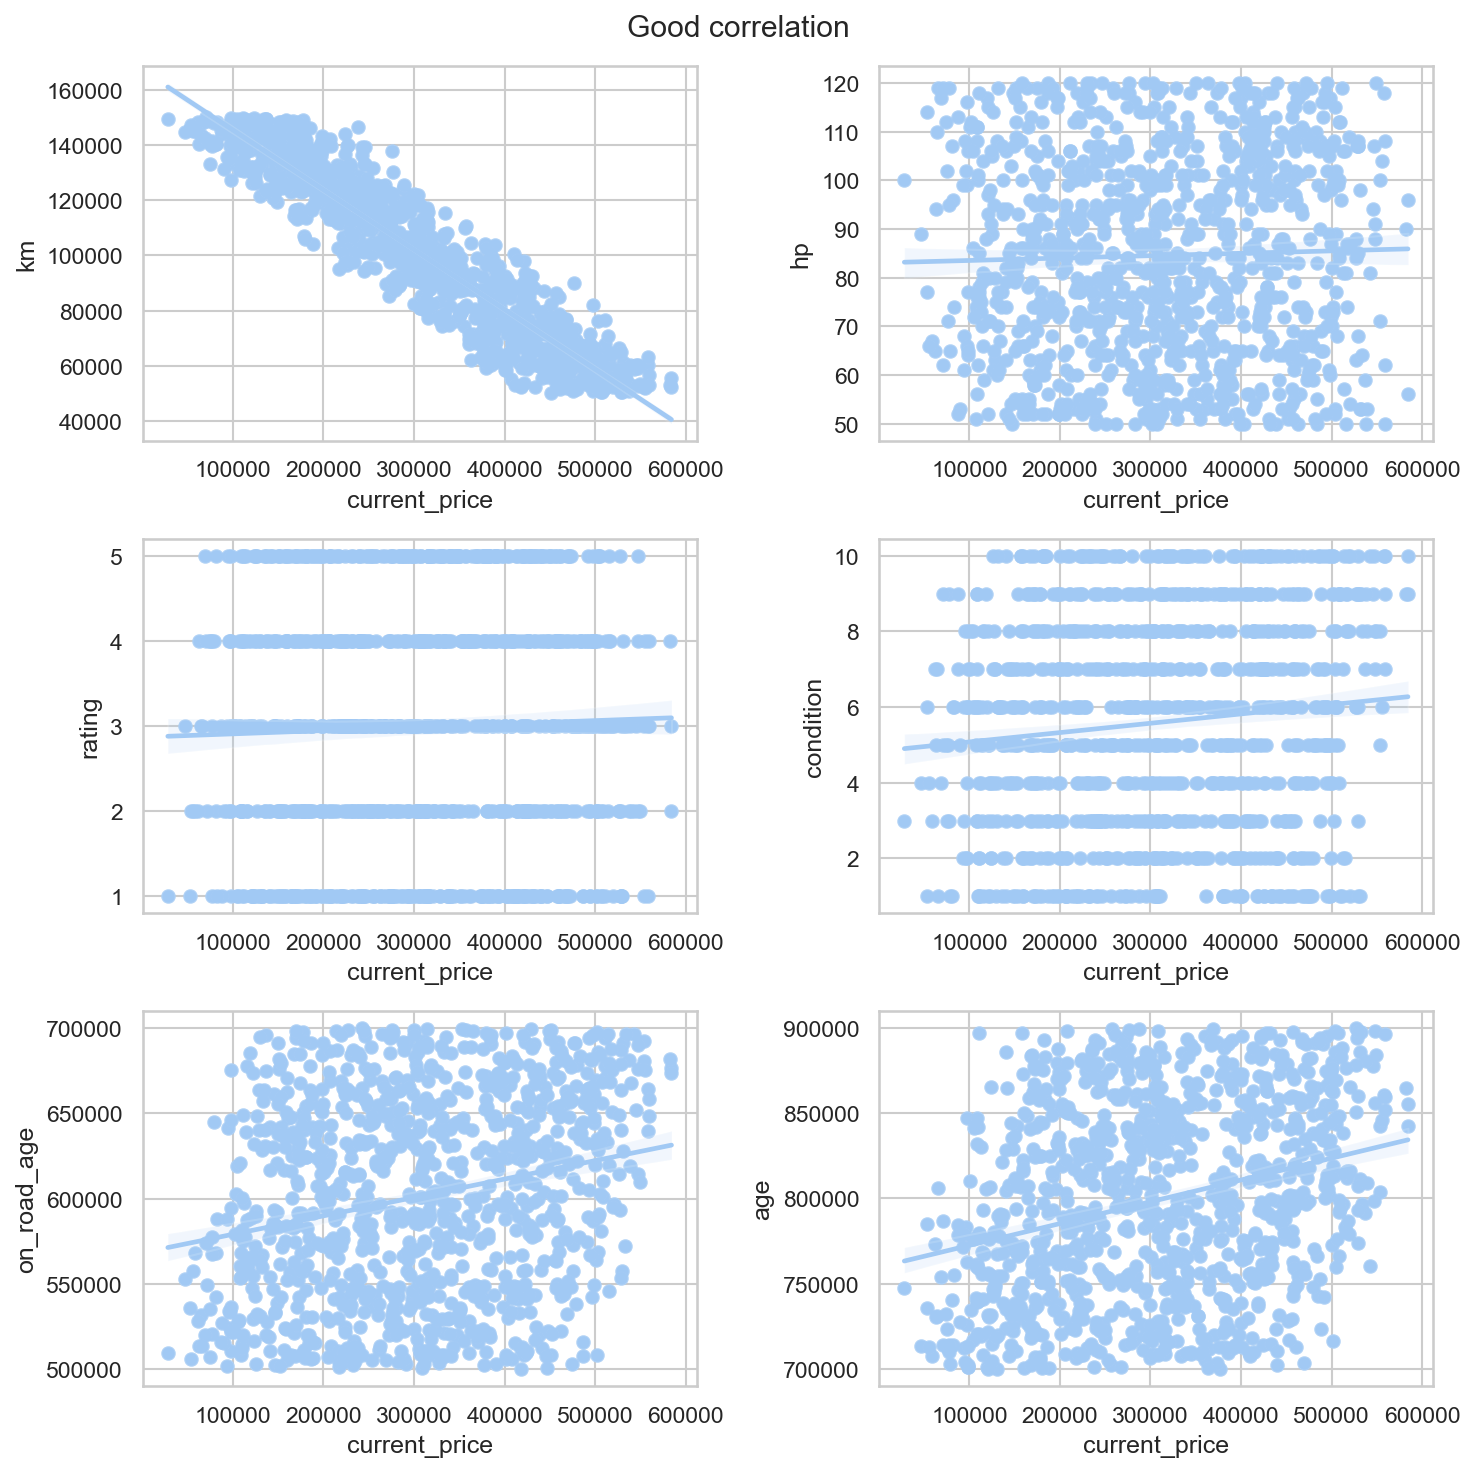

In [27]:
plt.figure(figsize=(10,10),dpi = 150)
for num,col in enumerate(high_correlated_col,start = 1):
    plt.subplot(3,2,num)
    sns.scatterplot(data = df,x = 'current_price',y = col)
    sns.regplot(data = df,x = 'current_price',y = col)
plt.suptitle('Good correlation')
plt.tight_layout()

In [28]:
high_corr = ['km','on_road_age','age']

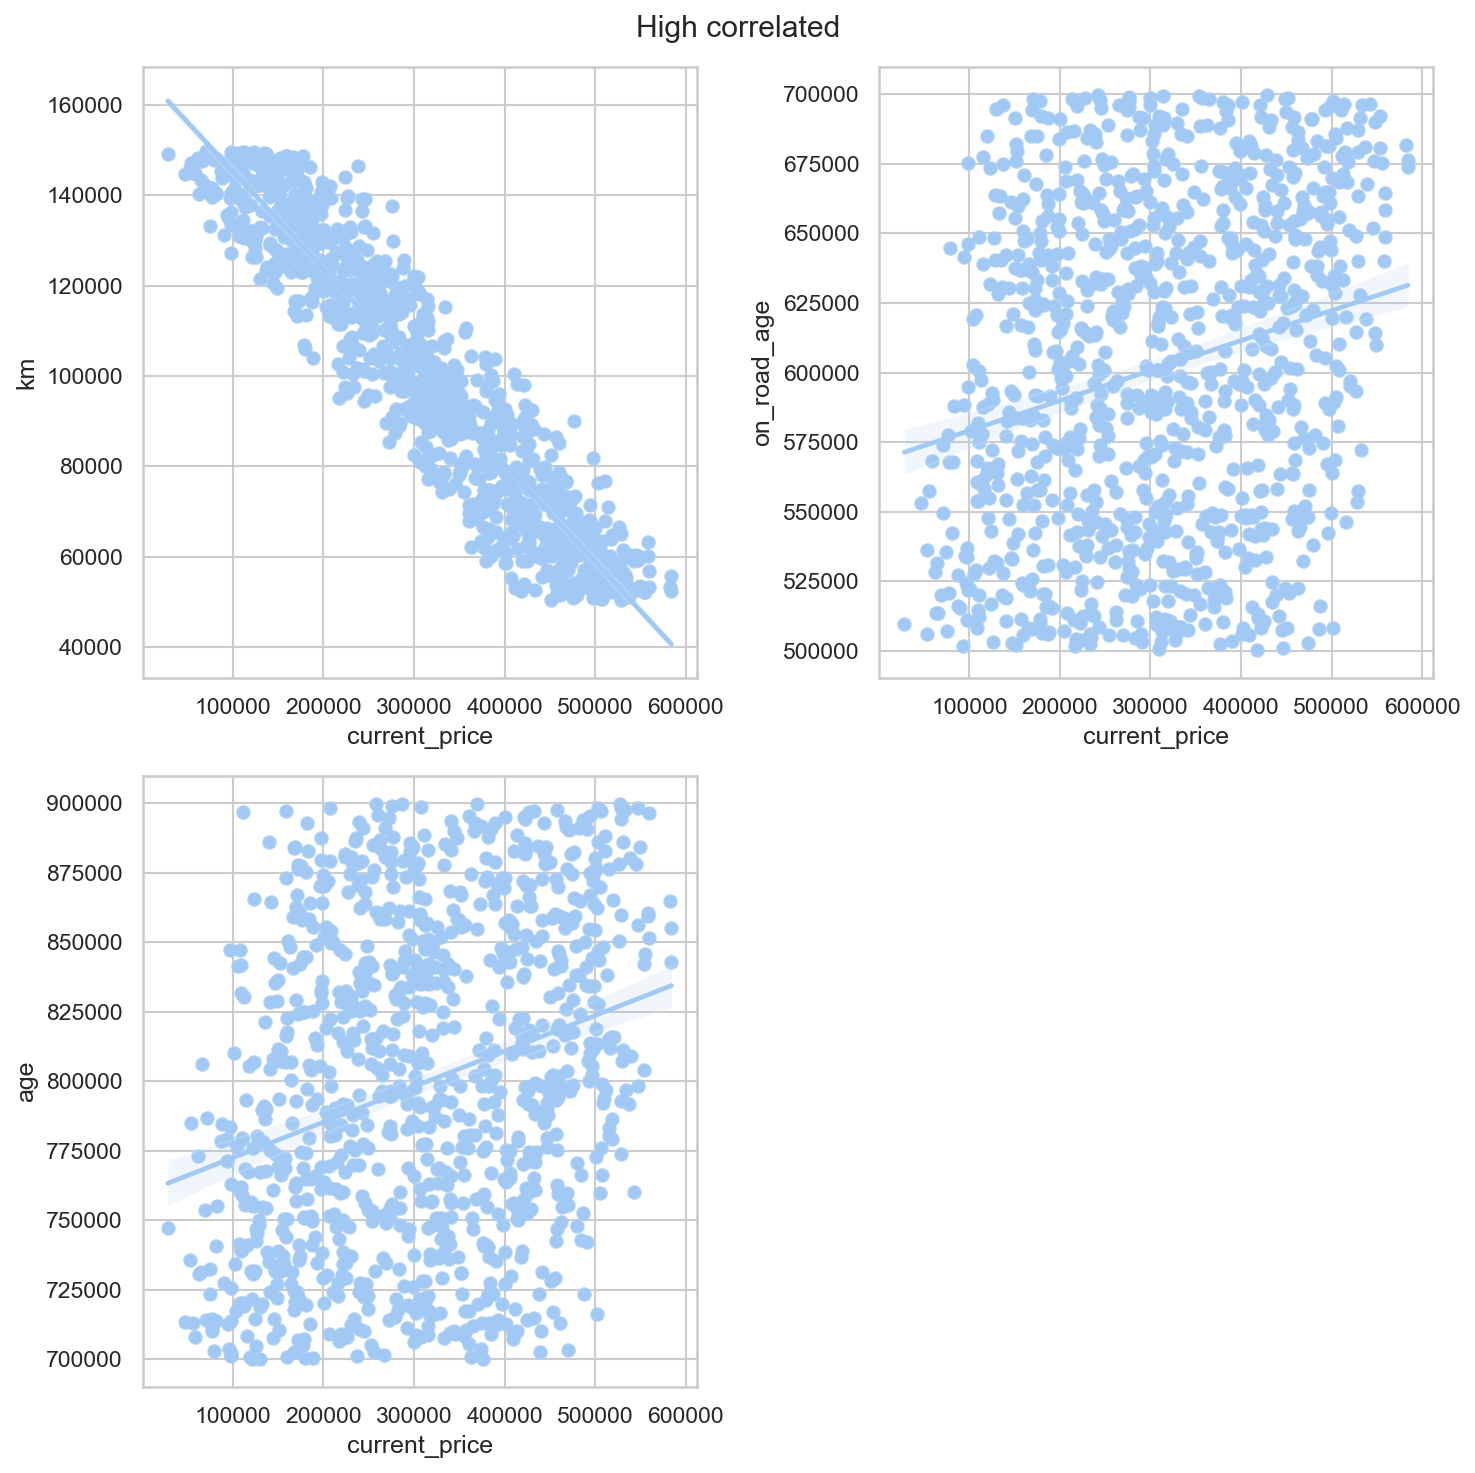

In [29]:
plt.figure(figsize=(10,10),dpi = 150)
for num,col in enumerate(high_corr,start = 1):
    plt.subplot(2,2,num)
    sns.scatterplot(data = df,x = 'current_price',y = col)
    sns.regplot(data = df,x = 'current_price',y = col)
plt.suptitle('High correlated')
plt.tight_layout()

In [30]:
df.drop(['years','torque'],axis = 1,inplace = True)
categorical_colums.remove('years')

# Splitting data

In [31]:
df.sample(3)

,on_road_age,age,km,rating,condition,economy,top_speed,hp,current_price
6,633344,756063,78025,1,9,15,171,94,410877.0
229,620634,878823,90829,5,5,11,141,58,389610.0
540,522202,828170,96723,4,2,11,143,114,288926.0


In [32]:
X = df.drop(['current_price'],axis = 1)
y = df[['current_price']]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Engineering

In [34]:
ct = ColumnTransformer([('scalar',StandardScaler(),list(df.drop(categorical_colums,axis = 1).columns[:-1])),
                        ('one_hot_encoder',OneHotEncoder(drop = 'first',sparse_output=True),categorical_colums)])

In [35]:
ct.fit(X_train)

ColumnTransformer(transformers=[('scalar', StandardScaler(),
                                 ['on_road_age', 'age', 'km', 'top_speed',
                                  'hp']),
                                ('one_hot_encoder', OneHotEncoder(drop='first'),
                                 ['rating', 'condition', 'economy'])])

In [36]:
X_train = ct.transform(X_train)
X_test = ct.transform(X_test)

In [37]:
X_train.shape,X_test.shape

((700, 25), (300, 25))

In [38]:
def conversion(array : np.array):
    return torch.tensor(array).type(torch.float)

In [39]:
X_train = conversion(X_train)
X_test = conversion(X_test)
y_train = conversion(np.array(y_train))
y_test = conversion(np.array(y_test))

In [40]:
class dataset(Dataset):
    def __init__(self,X,y):
        self.X = X
        self.y = y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,i):
        return self.X[i],self.y[i]

In [41]:
train_data = dataset(X_train,y_train)

In [42]:
train_data

In [43]:
train_batches = DataLoader(train_data,batch_size=64,shuffle=True)

In [44]:
train_batch = next(iter(train_batches))

In [45]:
class LinearRegressionModel(nn.Module):
    def __init__(self,input_nodes : int,hidden_nodes : int,output_nodes : int):
        super().__init__()
        
        self.deep_neural_network = nn.Sequential(nn.Linear(in_features=input_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=hidden_nodes),
                                                nn.ReLU(),
                                                nn.Linear(in_features=hidden_nodes,out_features=output_nodes))
        
    def forward(self,X):
        return self.deep_neural_network(X)

In [46]:
X_train.shape

torch.Size([700, 25])

In [47]:
torch.manual_seed(42)
model = LinearRegressionModel(input_nodes=25,hidden_nodes=32,output_nodes=1)

In [48]:
model

LinearRegressionModel(
  (deep_neural_network): Sequential(
    (0): Linear(in_features=25, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)

In [49]:
l1_loss = 0
for params in model.parameters():
    l1_loss += torch.norm(params,1)
l1_loss

tensor(271.1015, grad_fn=<AddBackward0>)

In [50]:
lossfn = nn.L1Loss()
optimizer = torch.optim.Adam(params=model.parameters(),lr = 0.01)

In [51]:
model.eval()
with torch.inference_mode():
    pred = model(train_batch[0])

In [52]:
pred.shape,train_batch[1].shape

(torch.Size([64, 1]), torch.Size([64, 1]))

In [53]:
lossfn(pred.squeeze(),train_batch[1].squeeze())

tensor(333896.1250)

In [54]:
epochs = 1000
training_loss_lst = []
testing_loss_lst = []
best_loss = 1e+9
counter = 0
patience = 100
l1_lambda = 0.001

for epoch in range(epochs):
    
    model.train()
    total_loss = 0
    
    for features,target in train_batches:
        
        pred = model(features).squeeze()
        
        loss = lossfn(pred,target.squeeze())
        l1_loss = 0
        for params in model.parameters():
            l1_loss += torch.norm(params,1)

        loss = loss + (l1_lambda*l1_loss)
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.detach().item()
        
    training_loss_lst.append(total_loss/len(train_batches))
    
    model.eval()
    with torch.inference_mode():
        pred = model(X_test).squeeze()
    loss = lossfn(pred,y_test.squeeze())
    
    testing_loss_lst.append(loss.item())
    
    if best_loss > testing_loss_lst[-1]:
        best_loss = testing_loss_lst[-1]
        state_dict = deepcopy(model.state_dict())
        counter = 0
    else:
        counter += 1
    
    if counter == patience:
        model.load_state_dict(state_dict)
        break

    if epoch%50 == 0:
        print(f"Epoch : {epoch}, Training loss : {training_loss_lst[-1]}, Testing loss : {testing_loss_lst[-1]}")

Epoch : 0, Training loss : 309591.9119318182, Testing loss : 306116.65625
Epoch : 50, Training loss : 12336.43172940341, Testing loss : 10199.78125
Epoch : 100, Training loss : 2930.252507990057, Testing loss : 3542.78759765625
Epoch : 150, Training loss : 2537.574374112216, Testing loss : 2891.982666015625
Epoch : 200, Training loss : 2603.59033203125, Testing loss : 2677.361572265625
Epoch : 250, Training loss : 2662.8838334517045, Testing loss : 2795.3916015625
Epoch : 300, Training loss : 2634.41318581321, Testing loss : 2848.560546875
Epoch : 350, Training loss : 2513.829900568182, Testing loss : 3764.97705078125


In [55]:
l1_loss = 0
for params in model.parameters():
    l1_loss += torch.norm(params,1)
l1_loss = l1_loss.item()

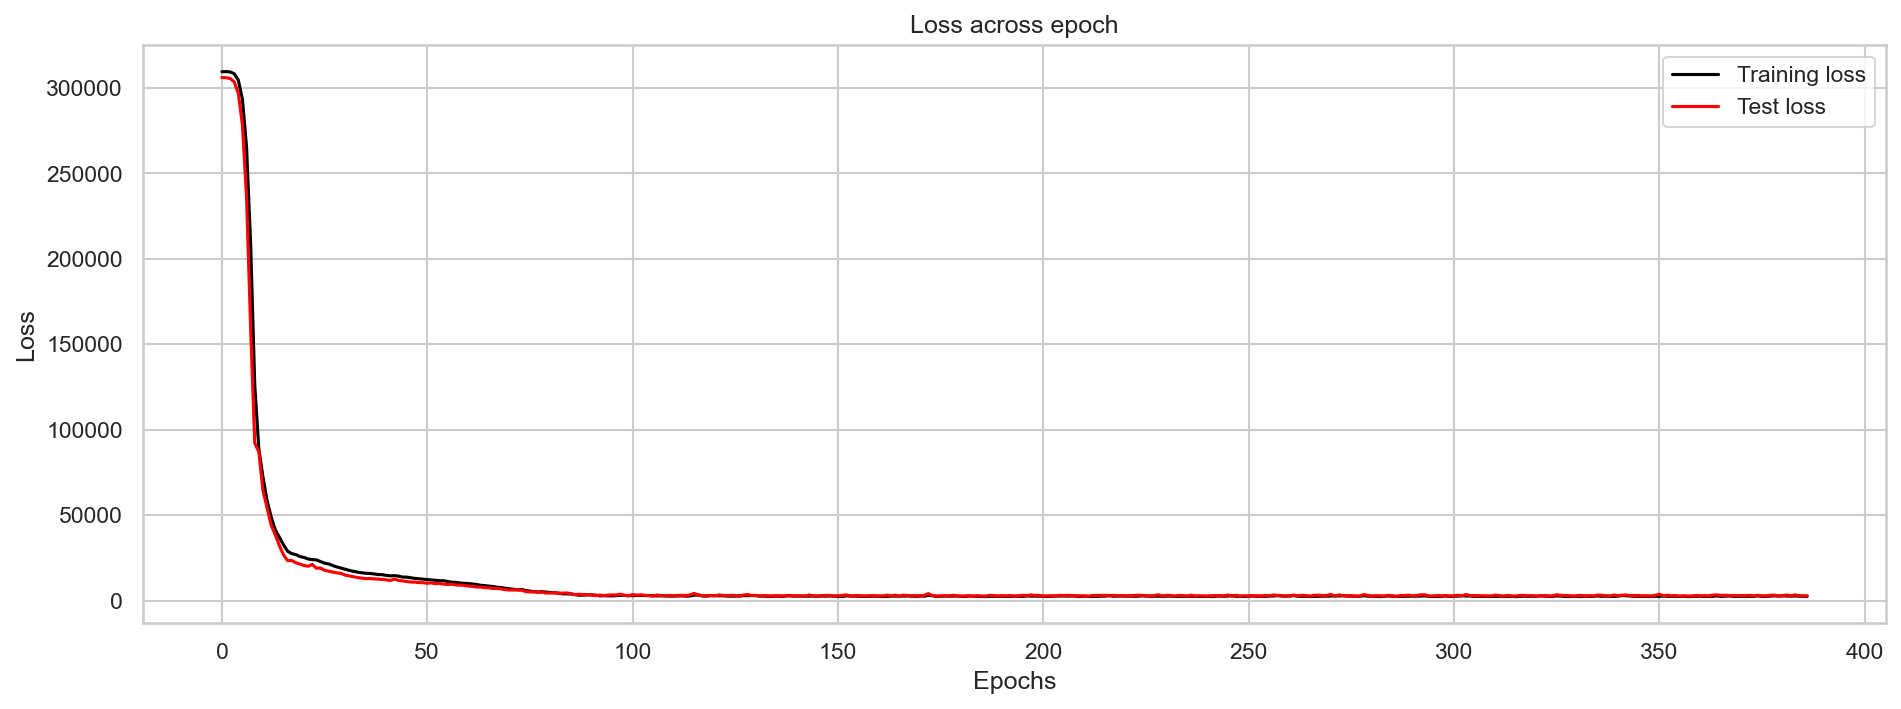

In [56]:
plt.figure(figsize=(15,5),dpi = 150)
sns.lineplot(x = range(len(training_loss_lst)),y = [val - (l1_lambda*l1_loss) for val in training_loss_lst],color = 'black',label = 'Training loss')
sns.lineplot(x = range(len(testing_loss_lst)),y = testing_loss_lst,color = 'red',label = 'Test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss across epoch')
plt.show()

In [57]:
model.eval()
with torch.inference_mode():
    pred = model(X_test).squeeze()

In [58]:
MAE = mean_absolute_error(y_test.squeeze(),pred)

In [59]:
MSE = mean_squared_error(y_test.squeeze(),pred)

In [60]:
RMSE = np.sqrt(MSE)

In [61]:
MAE,MSE,RMSE

(2572.9912, 12506522.0, 3536.456)

Text(0, 0.5, 'Prediction')

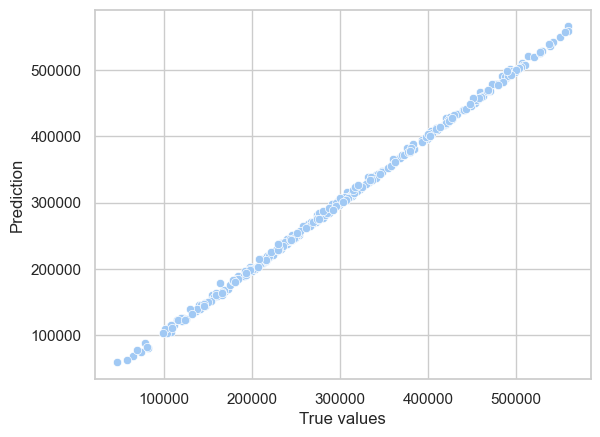

In [62]:
plt.figure(dpi = 100)
sns.scatterplot(x = y_test.squeeze(),y = pred)
plt.xlabel('True values')
plt.ylabel('Prediction')

<Axes: ylabel='Density'>

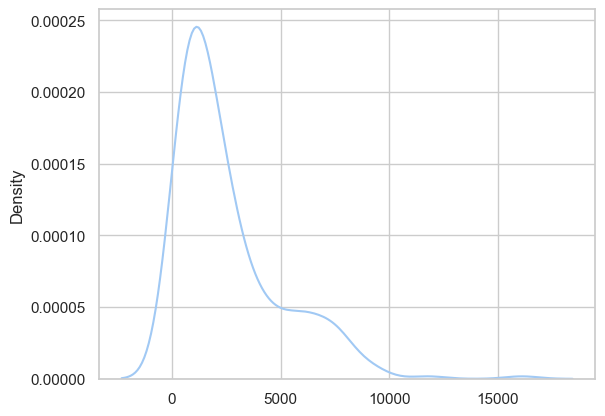

In [63]:
sns.kdeplot(np.abs(y_test.squeeze()-pred))

In [64]:
loss_percentage = (MAE)*100/df['current_price'].mean()

In [65]:
r2_score(y_test,pred)

0.99919350313178

In [66]:
def adjusted_r2_score(y_true, y_pred, n, k):
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - k - 1))
    return adjusted_r2

In [67]:
adjusted_r2_score(y_test,pred,300,25)

0.999119917651103

In [68]:
df.columns

Index(['on_road_age', 'age', 'km', 'rating', 'condition', 'economy',
       'top_speed', 'hp', 'current_price'],
      dtype='object')

In [69]:
%%writefile main.py
import sys
import pickle
import torch
from torch import nn
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

class LinearRegressionModel(nn.Module):
    def __init__(self, input_nodes: int, hidden_nodes: int, output_nodes: int):
        super().__init__()

        self.deep_neural_network = nn.Sequential(nn.Linear(in_features=input_nodes, out_features=hidden_nodes),
                                                 nn.ReLU(),
                                                 nn.Linear(in_features=hidden_nodes, out_features=hidden_nodes),
                                                 nn.ReLU(),
                                                 nn.Linear(in_features=hidden_nodes, out_features=hidden_nodes),
                                                 nn.ReLU(),
                                                 nn.Linear(in_features=hidden_nodes, out_features=output_nodes))

    def forward(self, X):
        return self.deep_neural_network(X)

with open('_models/model.pkl', 'rb') as f:
    model = pickle.load(f)

with open('_models/ct.pkl', 'rb') as f:
    ct = pickle.load(f)

args = sys.argv[1:]
columns = ['on_road_age', 'age', 'km', 'rating', 'condition', 'economy','top_speed', 'hp']
dic = {}
for col in columns:
    index = args.index(col) + 1
    dic[col] = int(args[index])
df = pd.DataFrame(data=dic,index = range(1))
df = df[columns].copy()
features = torch.tensor(ct.transform(df)).type(torch.float)
with torch.inference_mode():
    pred = model(features)
print(f"The price of car is : {pred.item()}")

Overwriting main.py


In [70]:
df.sample(4)

,on_road_age,age,km,rating,condition,economy,top_speed,hp,current_price
134,632769,841027,60944,4,6,11,151,116,489368.0
207,572334,897566,55973,3,9,15,177,53,532570.5
620,648340,802177,91222,4,9,10,181,112,389099.0
655,614671,850494,52443,2,6,15,163,88,526502.5
